### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
raw_csv_data.head()

date     spx      dax     ftse    nikkei
0  07/01/1994  469.90  2224.95  3445.98  18124.01
1  10/01/1994  475.27  2225.00  3440.58  18443.44
2  11/01/1994  474.13  2228.10  3413.77  18485.25
3  12/01/1994  474.17  2182.06  3372.02  18793.88
4  13/01/1994  472.47  2142.37  3360.01  18577.26

In [4]:
df_comp.head()

spx      dax     ftse    nikkei
date                                          
1994-01-07  469.90  2224.95  3445.98  18124.01
1994-01-10  475.27  2225.00  3440.58  18443.44
1994-01-11  474.13  2228.10  3413.77  18485.25
1994-01-12  474.17  2182.06  3372.02  18793.88
1994-01-13  472.47  2142.37  3360.01  18577.26



### Removing Surplus Data

In [5]:
df_comp['market_value']=df_comp.spx

In [6]:
print(int(len(df_comp))) 
int(len(df_comp)*0.8)

6277


5021

In [7]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [8]:
df

market_value
date                    
1994-01-07    469.900000
1994-01-10    475.270000
1994-01-11    474.130000
1994-01-12    474.170000
1994-01-13    472.470000
...                  ...
2013-04-01   1562.173837
2013-04-02   1570.252238
2013-04-03   1553.686978
2013-04-04   1559.979316
2013-04-05   1553.278930

[5021 rows x 1 columns]

### White Noise

In [9]:
wn =  np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(),  size= len(df))

In [10]:
df['wn'] = wn

C:\Users\anubhaw.sharma\AppData\Local\Temp\ipykernel_23148\672873062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [12]:
df.describe()

market_value           wn
count   5021.000000  5021.000000
mean    1091.651926  1086.839663
std      292.559287   293.038728
min      438.920000   -27.977783
25%      914.620000   886.038210
50%     1144.650000  1087.195666
75%     1316.280729  1279.823898
max     1570.252238  2170.533107

Text(0.5, 1.0, 'White Noise Time-Series')

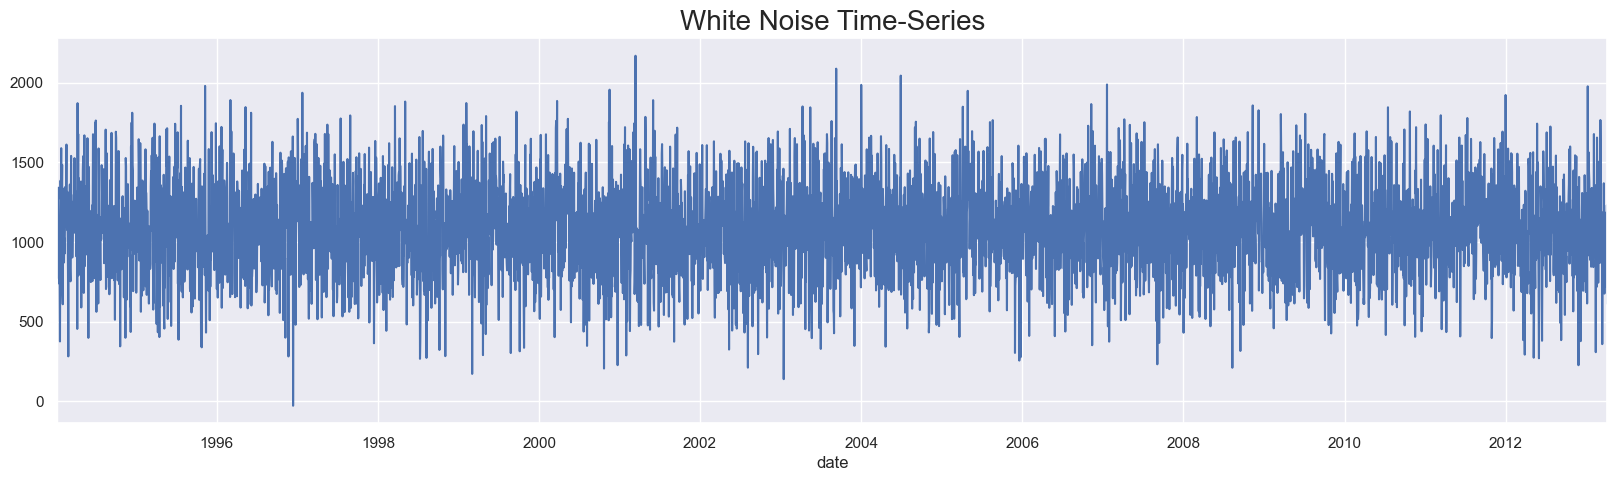

In [15]:
df.wn.plot(figsize=(20,5))
plt.title('White Noise Time-Series', size= 20)

(0.0, 2300.0)

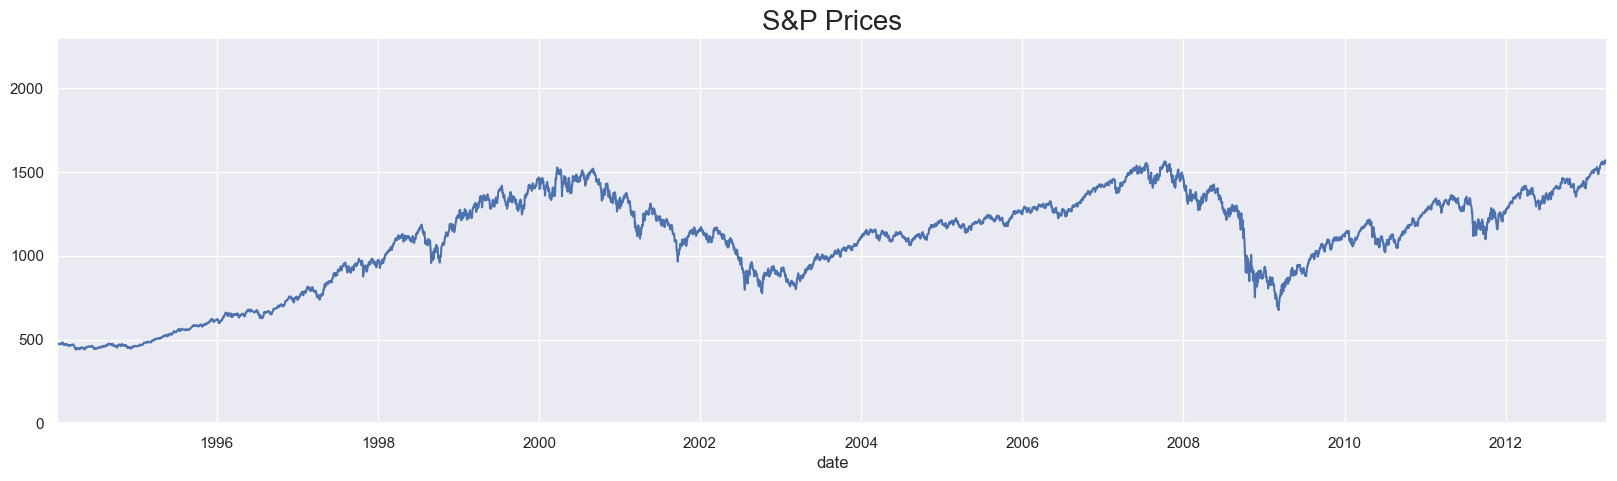

In [17]:
df.market_value.plot(figsize=(20,5))
plt.title('S&P Prices', size= 20)
plt.ylim((0,2300))

### Random Walk

In [24]:
import  warnings
warnings.filterwarnings('ignore')

In [25]:
rw = pd.read_csv('RandWalk.csv')
rw.head()

date        price
0  07/01/1994  1122.139662
1  08/01/1994  1135.238562
2  09/01/1994  1109.897831
3  10/01/1994  1080.347860
4  11/01/1994  1082.095245

In [28]:
 pd.to_datetime(rw.date)

0      1994-07-01
1      1994-08-01
2      1994-09-01
3      1994-10-01
4      1994-11-01
          ...    
7024   2013-01-04
7025   2013-02-04
7026   2013-03-04
7027   2013-04-04
7028   2013-05-04
Name: date, Length: 7029, dtype: datetime64[ns]

In [33]:
 pd.to_datetime(rw.date, dayfirst=True)

0      1994-01-07
1      1994-01-08
2      1994-01-09
3      1994-01-10
4      1994-01-11
          ...    
7024   2013-04-01
7025   2013-04-02
7026   2013-04-03
7027   2013-04-04
7028   2013-04-05
Name: date, Length: 7029, dtype: datetime64[ns]

In [34]:
rw.date  = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)
rw = rw.asfreq('b')

In [35]:
rw

price
date                   
1994-01-07  1122.139662
1994-01-10  1080.347860
1994-01-11  1082.095245
1994-01-12  1083.639265
1994-01-13  1067.146255
...                 ...
2013-04-01  2263.675474
2013-04-02  2225.000870
2013-04-03  2190.787688
2013-04-04  2195.240033
2013-04-05  2152.992143

[5021 rows x 1 columns]

In [36]:
rw.describe()

price
count  5021.000000
mean   1269.944293
std     444.216793
min     585.483034
25%     931.550429
50%    1156.363045
75%    1488.362029
max    2715.508720

In [37]:
df['rw'] = rw.price

In [38]:
df.head()

market_value           wn           rw
date                                              
1994-01-07        469.90  1029.020983  1122.139662
1994-01-10        475.27   776.759257  1080.347860
1994-01-11        474.13  1322.786880  1082.095245
1994-01-12        474.17  1342.002831  1083.639265
1994-01-13        472.47  1110.188780  1067.146255

Text(0.5, 1.0, 'Random Walk')

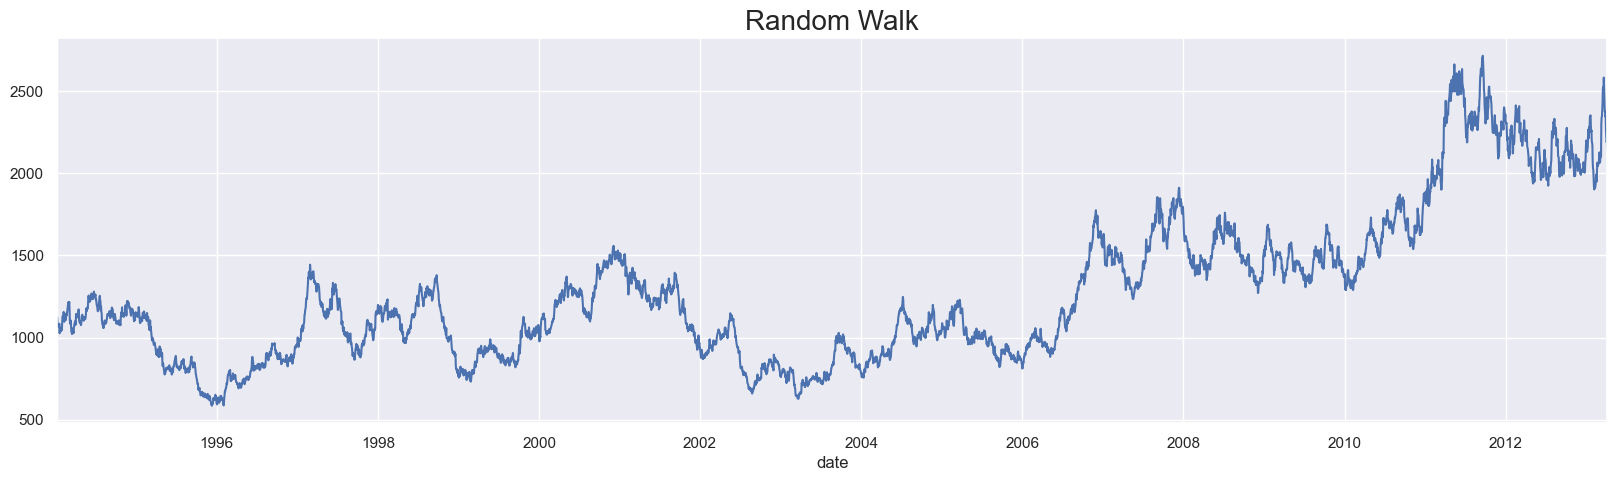

In [39]:
df.rw.plot(figsize=(20,5))
plt.title('Random Walk', size= 20)

Text(0.5, 1.0, 'S&P Prices')

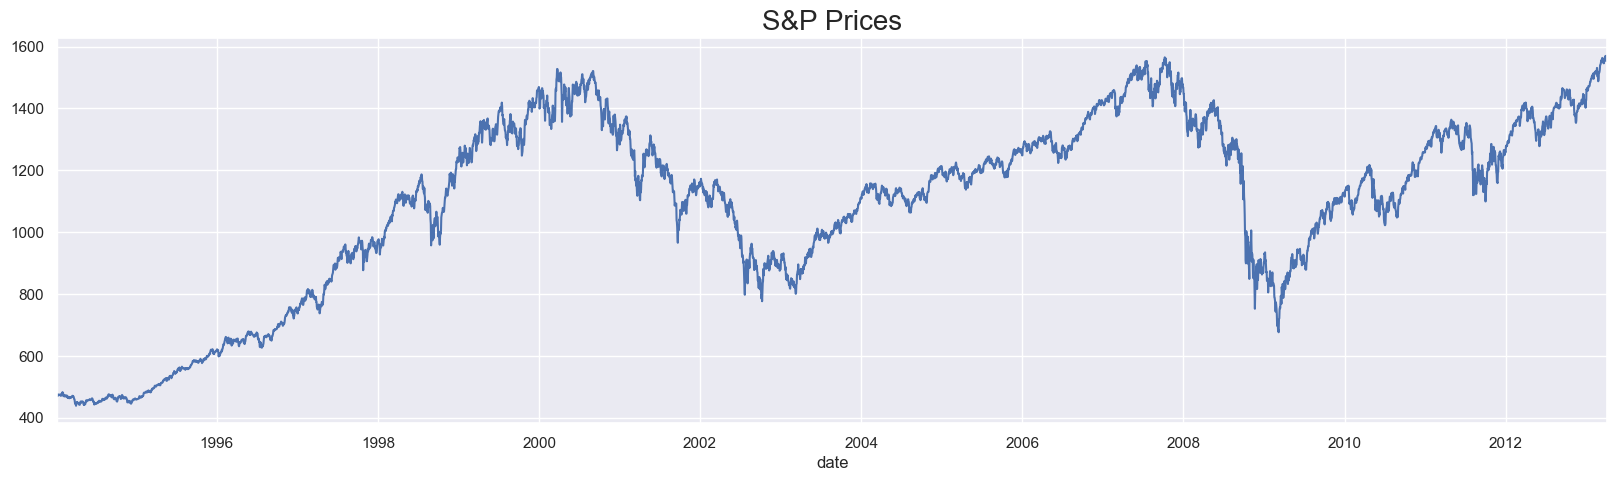

In [40]:
df.market_value.plot(figsize=(20,5))
plt.title('S&P Prices', size= 20)

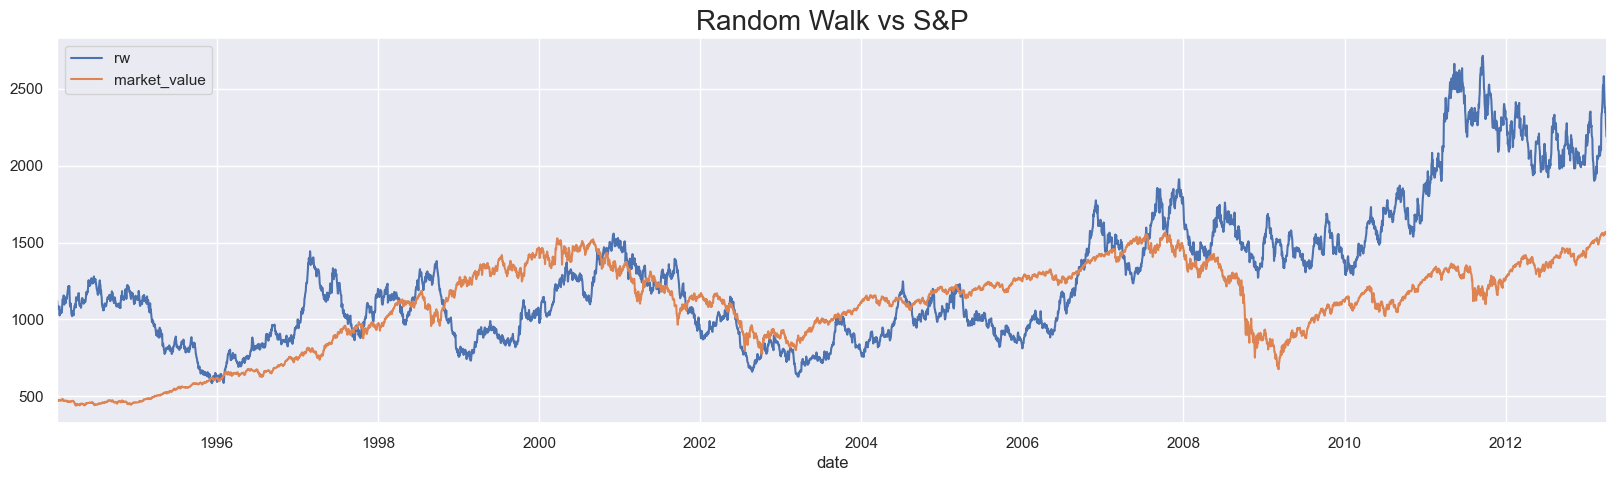

In [43]:
df.rw.plot(figsize=(20,5))
df.market_value.plot(figsize=(20,5))
plt.title('Random Walk vs S&P', size= 20)
plt.legend()

### Stationarity

In [44]:
import statsmodels.tsa.stattools as sts

In [45]:
sts.adfuller(df.market_value)

(-1.7369847452352452,
 0.41216456967706144,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [46]:
sts.adfuller(df.wn)

(-49.23695256963852,
 0.0,
 1,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 70825.28203528815)

In [47]:
sts.adfuller(df.rw)

(-1.3286073927689726,
 0.6159849181617382,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

`Additive:`
- Observed = Trend + Seasonal + Residual

`Multiplicative:`
- Observed = Trend x Seasonal x Residual

### Seasonality

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

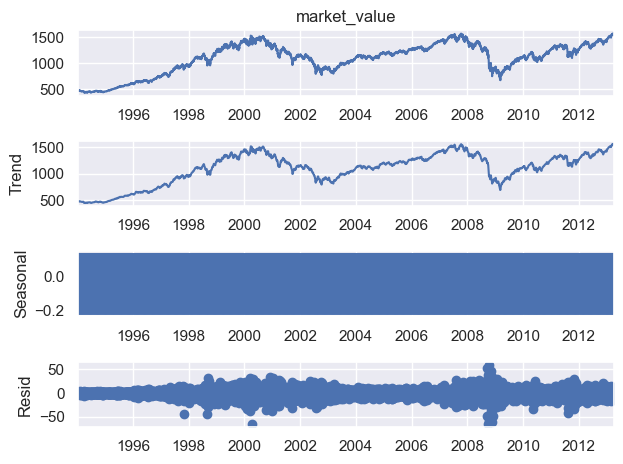

In [50]:
s_dec_additive = seasonal_decompose(df.market_value, model='additive')
s_dec_additive.plot()
plt.show()

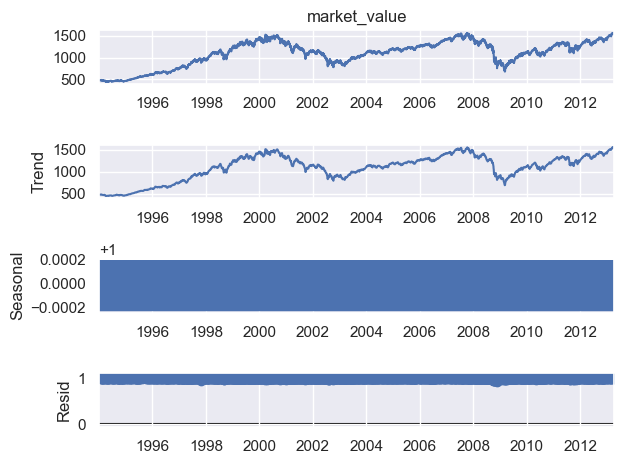

In [52]:
s_dec_multliplicative = seasonal_decompose(df.market_value, model='multliplicative')
s_dec_multliplicative.plot()
plt.show()

### ACF

In [53]:
import statsmodels.graphics.tsaplots as sgt

Text(0.5, 1.0, 'ACF S&P')

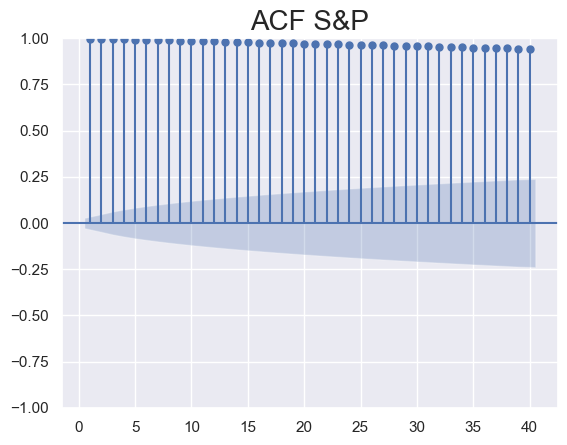

In [54]:
sgt.plot_acf(df.market_value, lags=40, zero=False)
plt.title('ACF S&P', size=20)

(-0.05, 0.05)

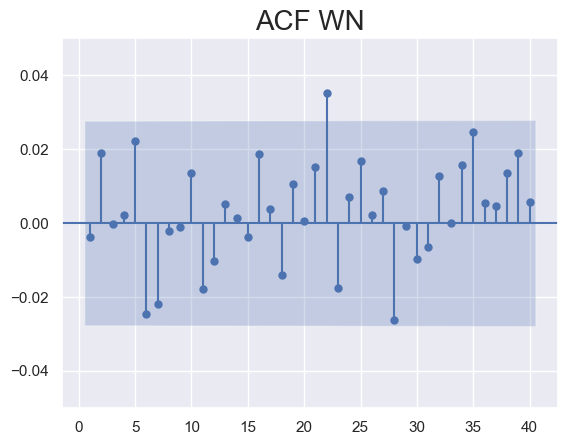

In [58]:
sgt.plot_acf(df.wn, lags=40, zero=False)
plt.title('ACF WN', size=20)
plt.ylim(-0.05,0.05)

Text(0.5, 1.0, 'ACF RW')

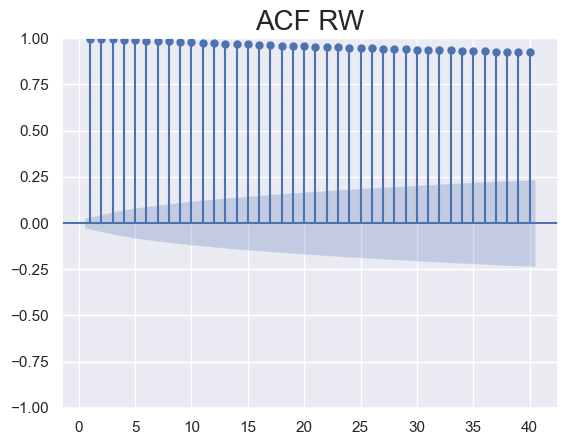

In [59]:
sgt.plot_acf(df.rw, lags=40, zero=False)
plt.title('ACF RW', size=20)

### PACF

Text(0.5, 1.0, 'PACF S&P')

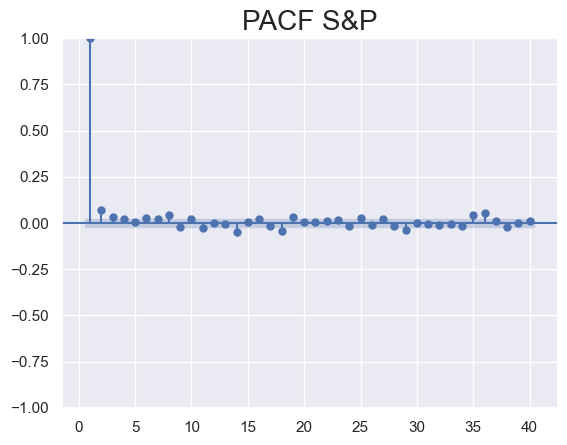

In [64]:
sgt.plot_pacf(df.market_value, lags=40, zero=False, method=('ols'))
plt.title('PACF S&P', size=20)
# plt.ylim(-0.25,0.25)

(-0.05, 0.05)

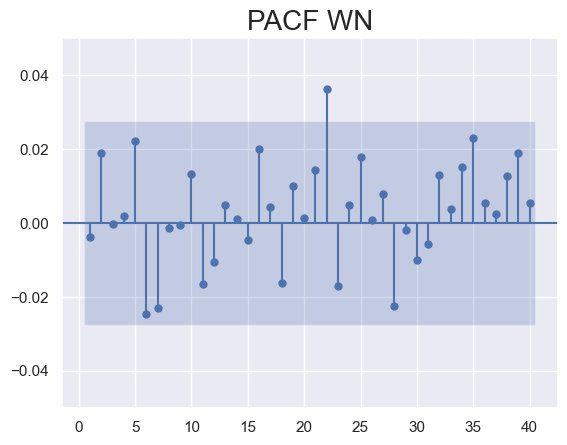

In [66]:
sgt.plot_pacf(df.wn, lags=40, zero=False, method=('ols'))
plt.title('PACF WN', size=20)
plt.ylim(-0.05,0.05)

Text(0.5, 1.0, 'PACF RW')

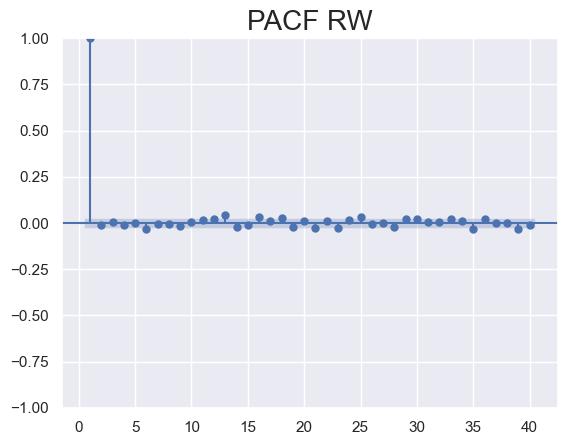

In [67]:
sgt.plot_pacf(df.rw, lags=40, zero=False, method=('ols'))
plt.title('PACF RW', size=20)
# plt.ylim(-0.05,0.05)